
# Setting up the development environment by importing required libraries and modules:

    Numpy: It will provide the support for efficient numerical computation.
    Pandas: It is convenient library that supports dataframes. Working with pandas will bring ease in many crucial data o o operations.
    Matplotlib: It provides a MATLAB-like plotting framework.
    Seaborn: It is a visualization library based on matplotlib which provides a high-level interface for drawing attractive s statistical graphics.
    Sklearn: It is python library for data mining, data analysis and machine learning



# IMPORTING LIB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/akdutt/avaideleteafteruse/master/Loan-Prediction-master/data/.csv')

# Getting to know your data

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
df.index

RangeIndex(start=0, stop=614, step=1)

# Attribute Classification

categorical data

  'Married', 'Dependents', 'Education','Self_Employed', ,'Property_Area', 'Loan_Status,Loan_Amount_Term
quantative data are : 'CoapplicantIncome','LoanAmount',',ApplicantIncome

# checking for null values in dataset

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# filling null values :  

In [9]:
df['Gender'] = df['Gender'].fillna("Male")

In [10]:
df['Married'] = df['Married'].fillna("Yes")

In [11]:
df['Dependents'] = df['Dependents'].fillna("0")

In [12]:
df['Self_Employed'] = df['Self_Employed'].fillna("No")

In [13]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [14]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [15]:
df['Credit_History'] = df['Credit_History'].fillna("1.0")


# again cheacking for null values in dataset

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


# Encoding Categorical Values

Married
replacing yes with 1 and no with *0*

In [20]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [21]:
df['Married']=np.where(df.Married == 'Yes',1,0)

Dependents
replacing 0 with 0 and 1 with 2 and 3+ with 3 

In [25]:
df['Dependents'] = np.where(df['Dependents'] == '0', 0, np.where(df['Dependents'] == '1', 1,np.where(df['Dependents'] == '2', 2, 3 )))

Education
replacing Graduate with 1 and notGraduate with *0*

In [26]:
df['Education'] = np.where(df['Education'] == 'Graduate', 1,0)

self_employed 
replacing NO with 1 and Yes with 0

In [27]:
df['Self_Employed'] = np.where(df['Self_Employed'] == 'No', 1,0)

Credit_History

In [28]:
df['Credit_History'] = np.where(df['Credit_History'] == '1.0', 1,0)

#Property_Area

In [29]:
df['Property_Area'] = np.where(df['Property_Area'] == 'Urban', 1,np.where(df['Property_Area'] == 'Semiurban', 2, 3))

#loan status

In [30]:
df['Loan_Status'] = np.where(df['Loan_Status'] == 'Y', 1,0)

# settng Loan_ID as index

In [31]:
df=df.set_index('Loan_ID')

In [32]:
df.head(10)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,1,1,5849,0.0,146.412162,360.0,0,1,1
LP001003,1,1,1,1,1,4583,1508.0,128.000000,360.0,0,3,0
LP001005,1,1,0,1,0,3000,0.0,66.000000,360.0,0,1,1
LP001006,1,1,0,0,1,2583,2358.0,120.000000,360.0,0,1,1
LP001008,1,0,0,1,1,6000,0.0,141.000000,360.0,0,1,1
LP001011,1,1,2,1,0,5417,4196.0,267.000000,360.0,0,1,1
LP001013,1,1,0,0,1,2333,1516.0,95.000000,360.0,0,1,1
LP001014,1,1,3,1,1,3036,2504.0,158.000000,360.0,0,2,0
LP001018,1,1,2,1,1,4006,1526.0,168.000000,360.0,0,1,1


In [33]:
df.Credit_History.value_counts()

0    564
1     50
Name: Credit_History, dtype: int64


# Making univairate graph

Statistical Analysis


1.  It includes finding the central tendencies like mean, median, mode, frequency table, range, std         deviation etc.

2. Distribution of individual variables.



Graphical Analysis

   1- Histogram
   2- KDE Plot
   3- Box Plot
   4- Violin Plot







In [34]:
# Let's look at the summary of the dataset
df.describe()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.866450,5403.459283,1621.245798,146.412162,342.410423,0.081433,1.962541,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.273722,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,0.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,0.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


C:\Users\mikkujain\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


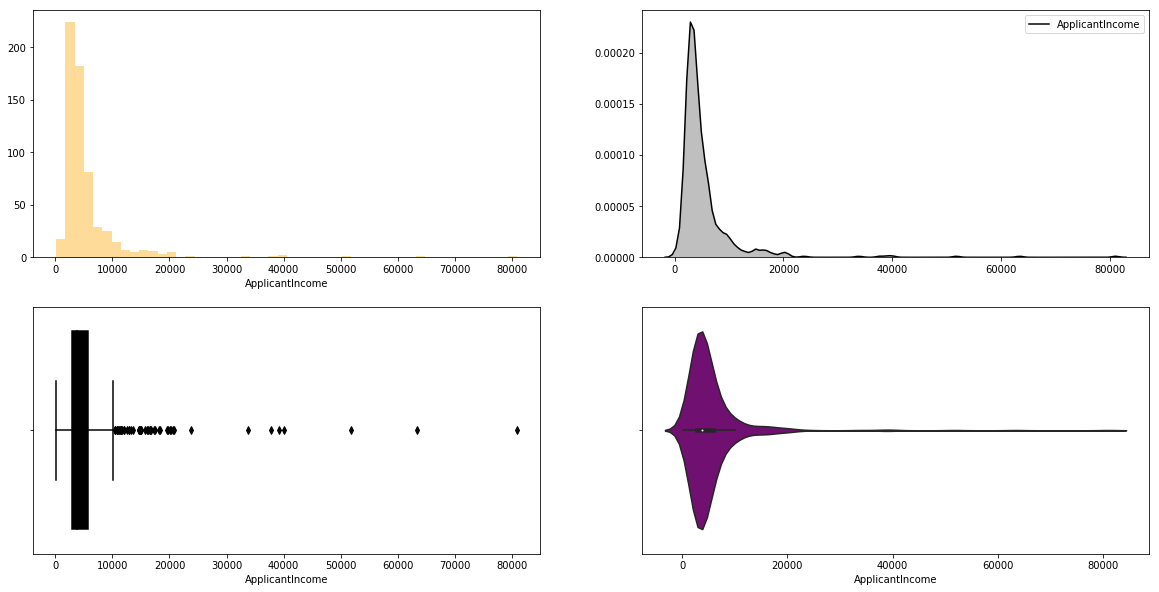

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['ApplicantIncome'],kde=False,color='orange')
plt.subplot(2,2,2)
sns.kdeplot(df['ApplicantIncome'],shade=True,color='k')
plt.subplot(2,2,3)
sns.boxplot(df['ApplicantIncome'],color='black')
plt.subplot(2,2,4)
sns.violinplot(df['ApplicantIncome'],color='purple')

C:\Users\mikkujain\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


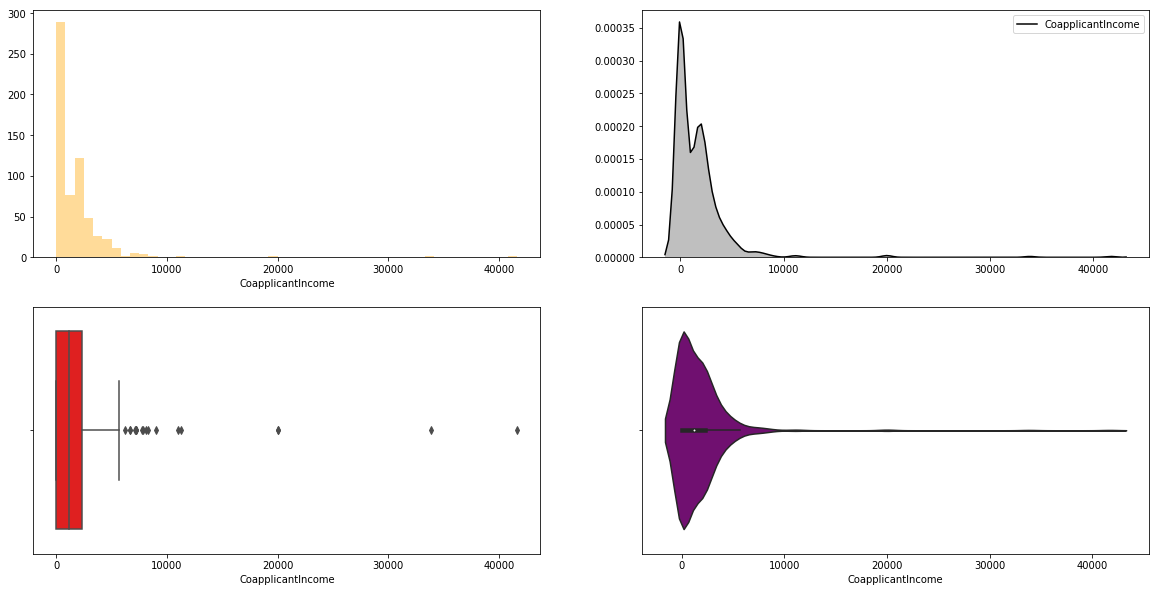

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['CoapplicantIncome'],kde=False,color='orange')
plt.subplot(2,2,2)
sns.kdeplot(df['CoapplicantIncome'],shade=True,color='k')
plt.subplot(2,2,3)
sns.boxplot(df['CoapplicantIncome'],color='red')
plt.subplot(2,2,4)
sns.violinplot(df['CoapplicantIncome'],color='purple')

C:\Users\mikkujain\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


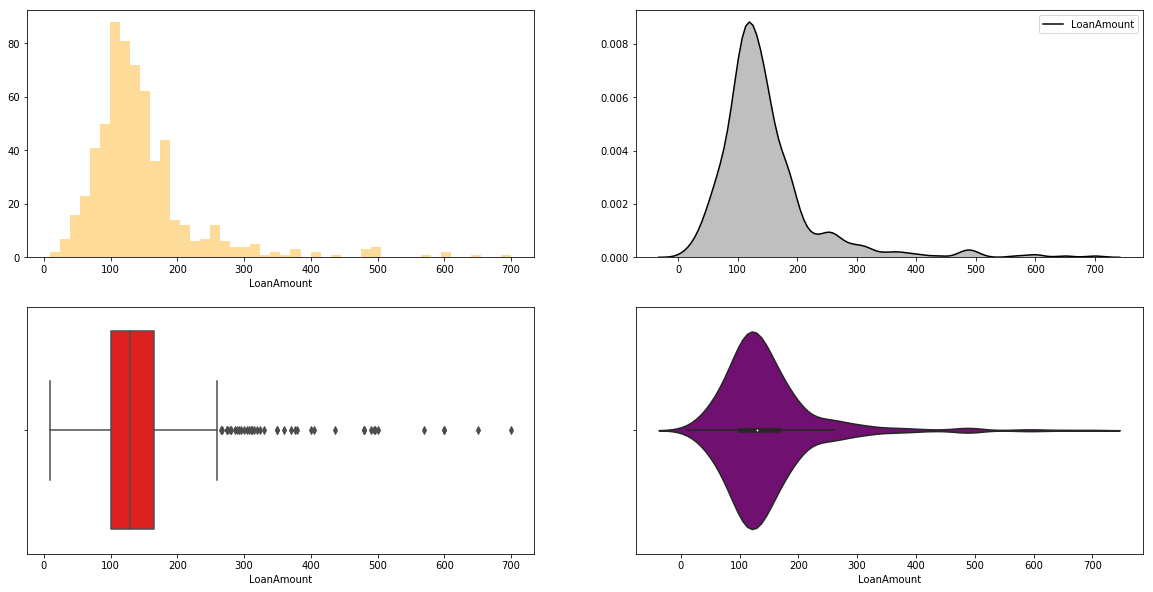

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['LoanAmount'],kde=False,color='orange')
plt.subplot(2,2,2)
sns.kdeplot(df['LoanAmount'],shade=True,color='k')
plt.subplot(2,2,3)
sns.boxplot(df['LoanAmount'],color='red')
plt.subplot(2,2,4)
sns.violinplot(df['LoanAmount'],color='purple')

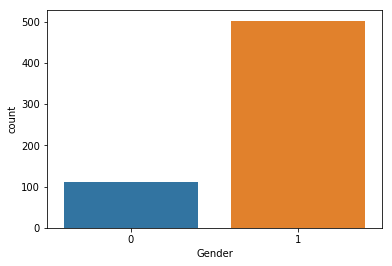

In [38]:
sns.countplot(df['Gender'])

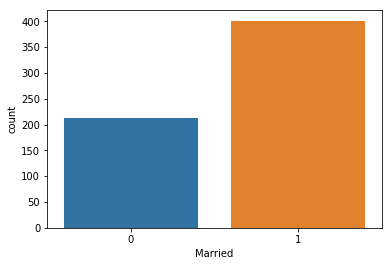

In [39]:
sns.countplot(df['Married'])

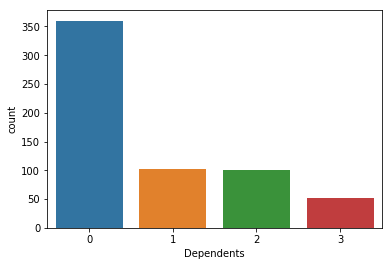

In [40]:
sns.countplot(df['Dependents'])

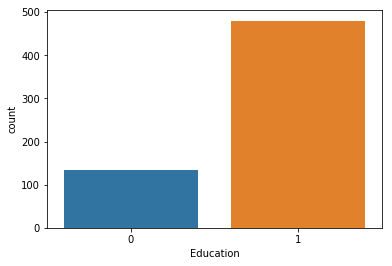

In [41]:
sns.countplot(df['Education'])

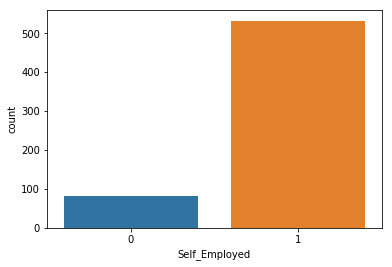

In [42]:
sns.countplot(df['Self_Employed'])

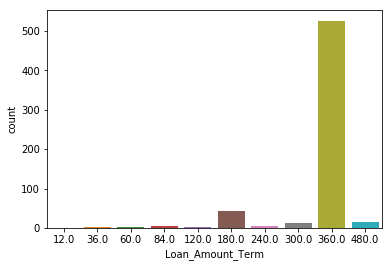

In [43]:
sns.countplot(df['Loan_Amount_Term'])

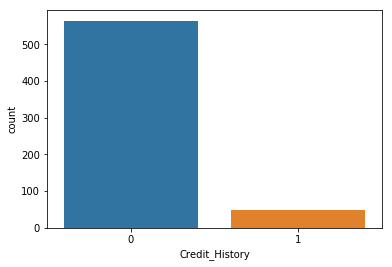

In [44]:
sns.countplot(df['Credit_History'])

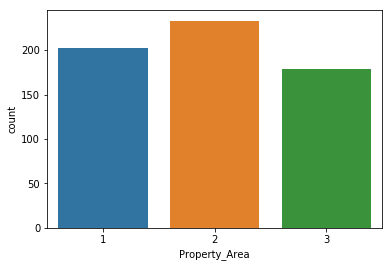

In [45]:
sns.countplot(df['Property_Area'])

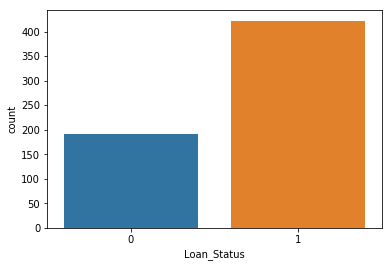

In [46]:
sns.countplot(df['Loan_Status'])

#Bivarte graph


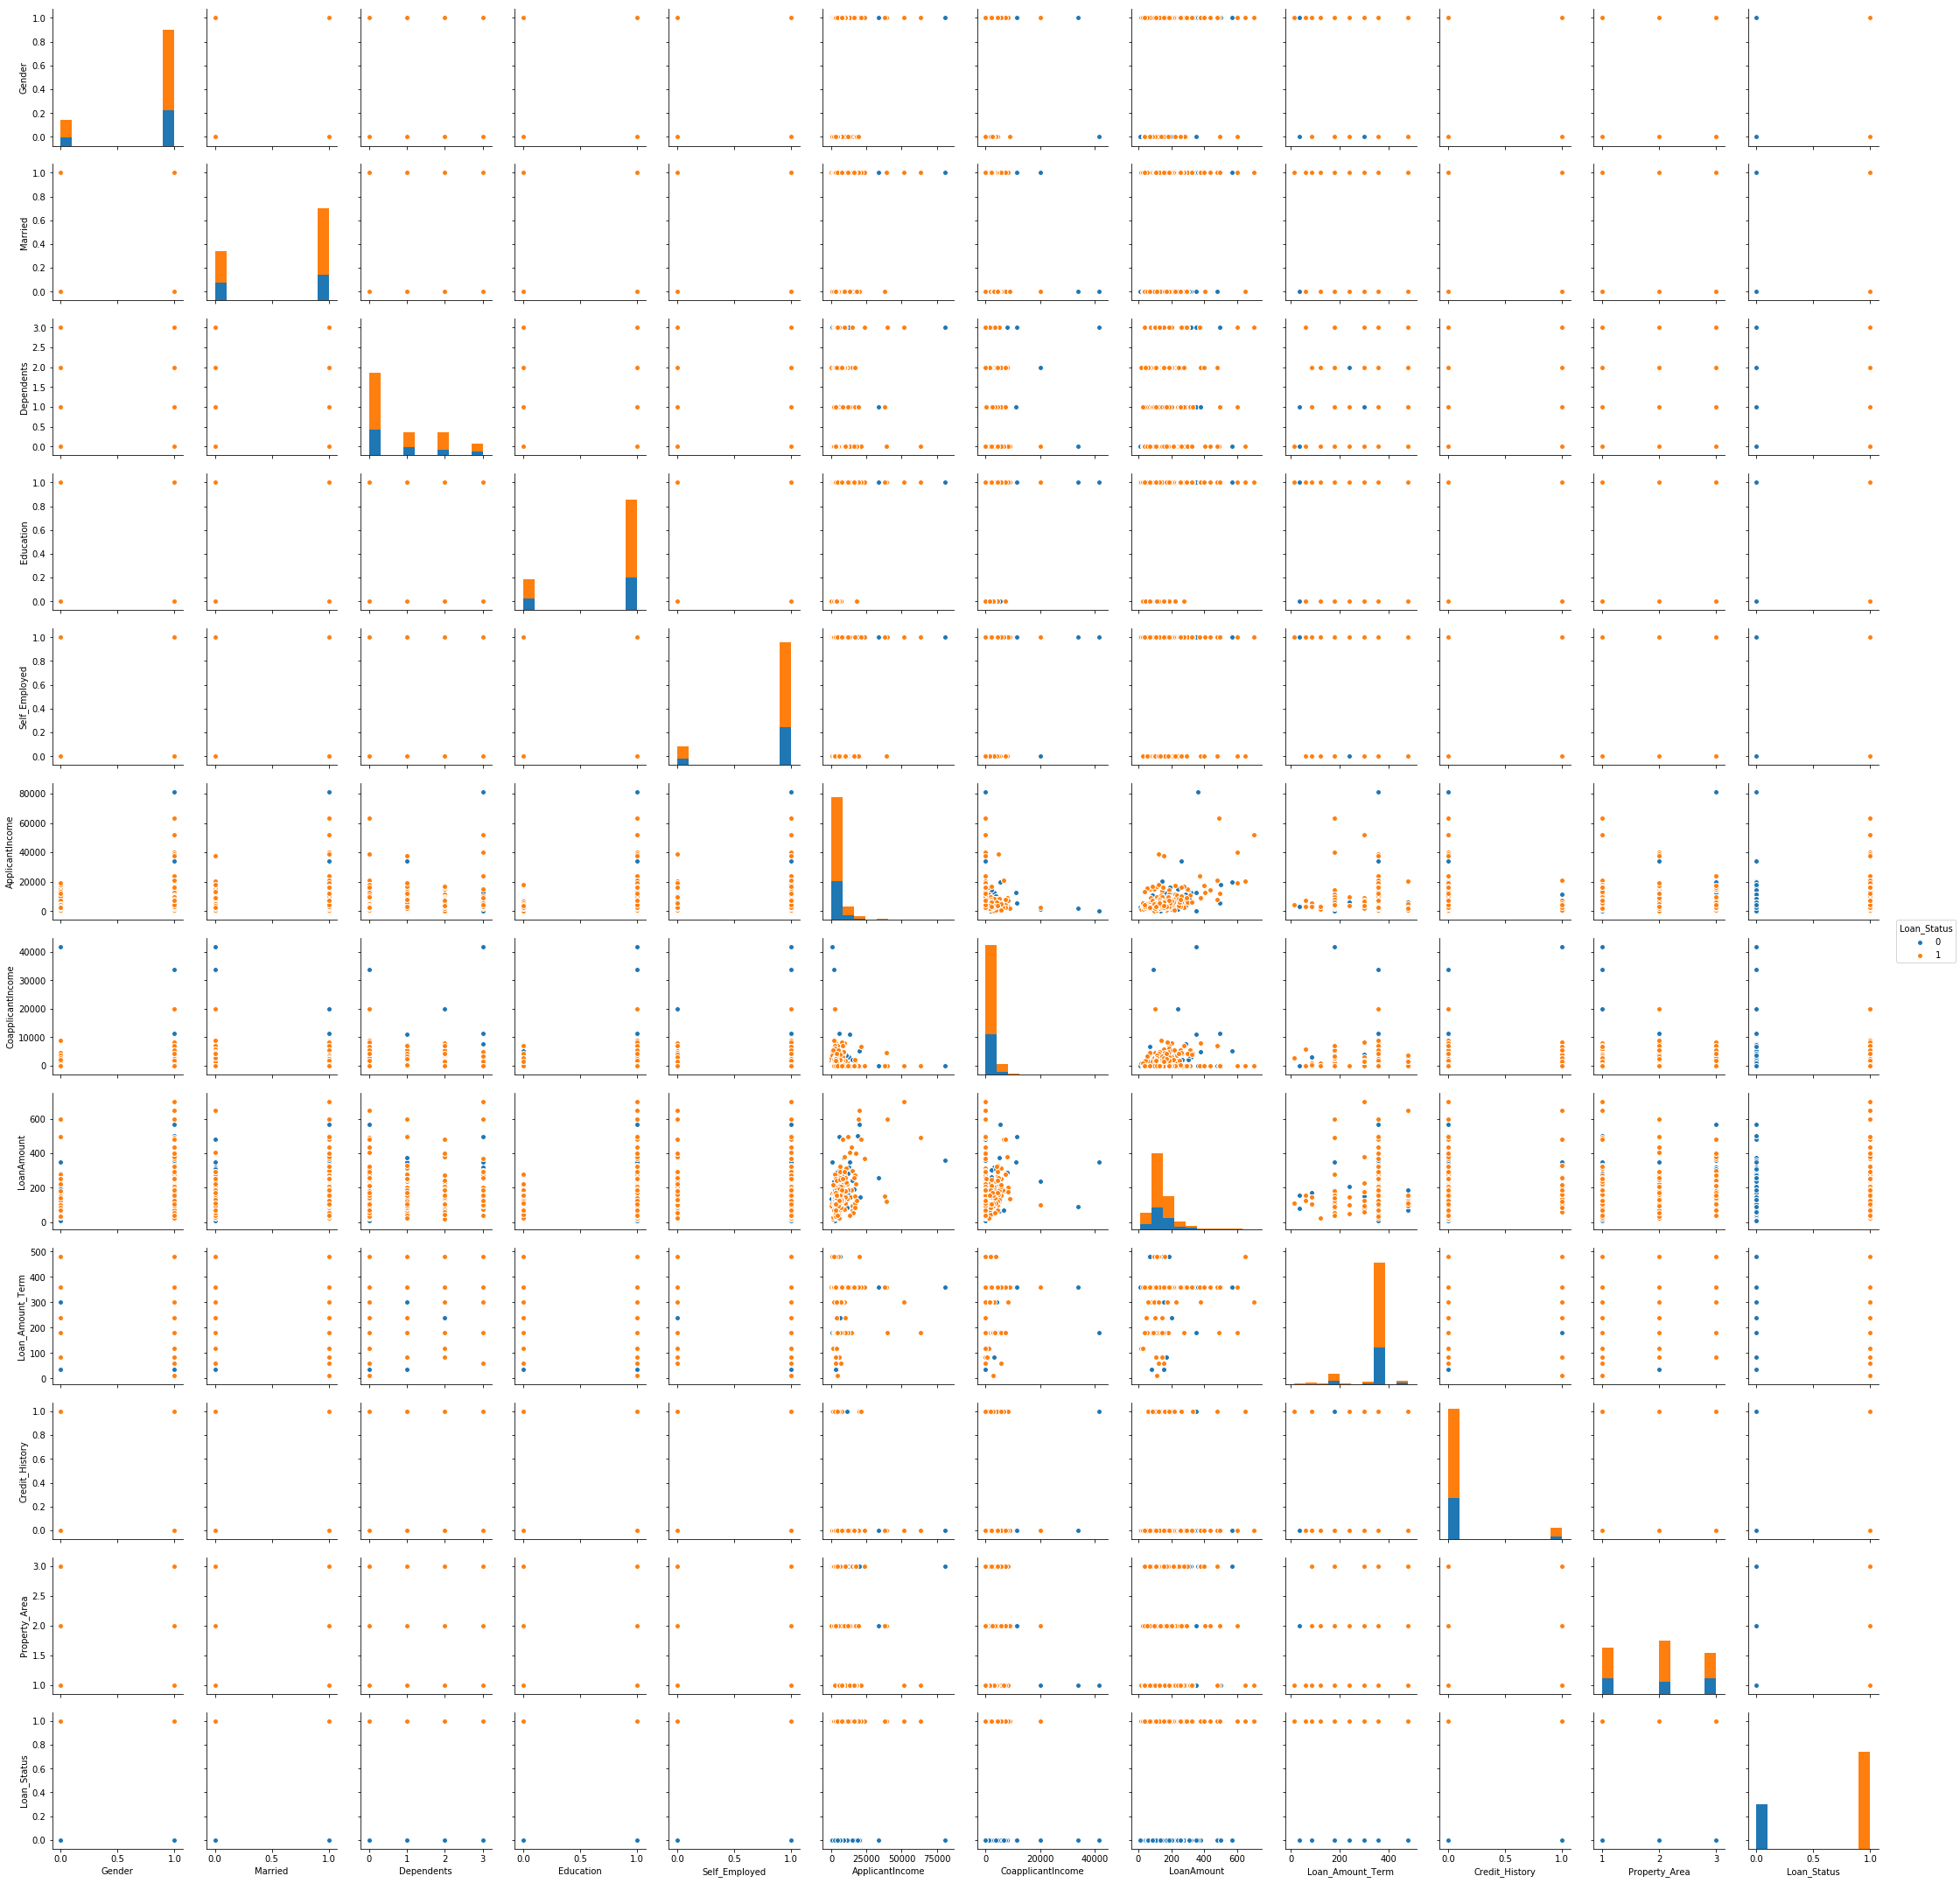

In [47]:
sns.pairplot(df,hue='Loan_Status')

# Multivariate graph






# Corelation between features/variables:

Let's check the corelation between the target variable and predictor variables,


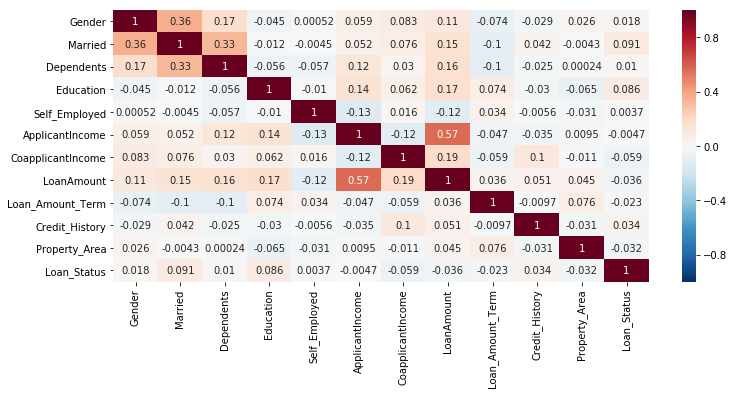

In [48]:
corr_matrix=df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix,annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [49]:
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Married              0.091478
Education            0.085884
Credit_History       0.033849
Gender               0.017987
Dependents           0.010118
Self_Employed        0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
Property_Area       -0.032112
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,1,1,5849,0.0,146.412162,360.0,0,1,1
LP001003,1,1,1,1,1,4583,1508.0,128.000000,360.0,0,3,0
LP001005,1,1,0,1,0,3000,0.0,66.000000,360.0,0,1,1
LP001006,1,1,0,0,1,2583,2358.0,120.000000,360.0,0,1,1
LP001008,1,0,0,1,1,6000,0.0,141.000000,360.0,0,1,1
